# Analysis of PAM datasets
The software exports the results as two folders if I am correct, one with data the other one called Report with various shit and txt files with the sampelnames
When reading in the data files there is one command that needs manual indication of the rows to skip

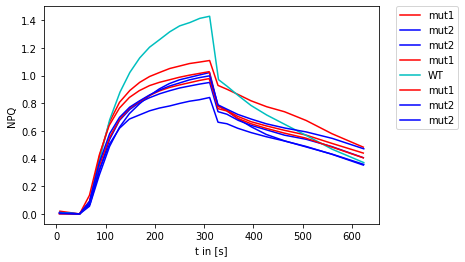

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#plt.style.use('classic')
#%matplotlib inline
#import numpy as np
ExpID = '20210619'
### Set your path to the folder containing the .csv files
PATH = './' + ExpID + '/' # Use your path

### Fetch all files in path
fileNames = os.listdir(PATH)
f, ax = plt.subplots()
ax.set_ylabel('NPQ')
ax.set_xlabel('t in [s]')
#ax.set_title('t')
NPQ_wt = []
NPQ_a = []
NPQ_b = []
### Filter file name list for files ending with .csv
fileNames = [file for file in fileNames if ').CSV' in file]


### Loop over all files
for file in fileNames:
    ###before skipping rows extract id to get sample name 
    #donot name id, this is a taken variable
    dfid = pd.read_csv(PATH + file,  sep = ';', skiprows = [3])
    #lasz row can be at 27 or 28! ilic[-n] returns the n last rows
    rows = dfid.tail(1)
    #####Get the unique identifier of each sample (W) to access the txt file with the sample name
    sampleID = rows.iloc[0]['No.']
    N=sampleID.partition(' ')[2]
    W=N.partition('.') [0]
    Name = pd.read_csv('./Report/' + ExpID + '/' + W + '.txt')
    NN=list(Name)
    
    ### Read .csv file and append to list, 
    #therby manually decide to skip rows in the end to trim datasets to the same lenght ( x axis of plot)
    #trimming of line 4 because it contains no data but calculations of f0 and fm that we do not need
    df = pd.read_csv(PATH + file,  sep = ';', skiprows = [4,29,30,31])
    
    
    #find max Fm
    column = df["Fm'"]
    max_Fm = column.max()
    #calculate NPQown maxFm/Fm'-1
    df['NPQown'] = (max_Fm/df["Fm'"])-1
    #find max NPQ
    columna = df["NPQown"]
    max_NPQ = columna.max()
    #find max Fo
    max_Fo = df["~Fo'"].max()
    #calculate phi PSIImax
    max_PSII = ((max_Fm - max_Fo)/max_Fm)
    #calculate phi PSII'
    df['PSII'] = ((df["Fm'"] - max_Fo)/df["Fm'"])
    #calculate qP 
    df['qP'] = ((df["Fm'"] - max_Fm) / (df["Fm'"] - max_Fo))
    #calculate rETR = PSII*PAR
    df['rETR'] = df['PSII'] * df['PAR']
    
    ##########DEFINE what parameters will be plottet on x and y axis###########
    x = df['t']
    y = df['NPQown']
    #y = df['rETR']
    
    #Fm/Fm'-1
    ### Create line for every file
    #ax.plot(x, y, label = file )
    #ax.plot(x, y, label = NN )
    #######Allocate or change Names of samples########
    strings = NN
    substring = "WT"
    sampleA = "LHCX1g1"
    sampleB = "LHCX1g2"

    substring_in_list = any(substring in string for string in strings)
    if substring_in_list :
        ## NPQ list
        #NPQ_wt.append[max_NPQ]

        ax.plot(x, y, label = "WT", color= 'c')
        
    substring_in_list = any(sampleA in string for string in strings)
    if substring_in_list :
        
        ax.plot(x, y, label = "mut1", color= 'red')    
    
    substring_in_list = any(sampleB in string for string in strings)
    if substring_in_list :
        
        ax.plot(x, y, label = "mut2", color= 'blue') 
        
    #y = df['Y(II)']
    #ax.plot (x,y, label = 'Y(II)', c = 'black')        

### label = 'file' for use in legend, needs handle
#file_patch = mpatches.Patch (label = file )
file_patch = mpatches.Patch (label = NN )
ax.legend(handles=[file_patch])
###Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#save the picture
plt.savefig(ExpID + 'colour.png', dpi=300, bbox_inches='tight')
### Generate the plot
plt.show()